In [3]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import json

import seaborn as sns

In [4]:
option = Options()
option.headless = True
driver = webdriver.Firefox(options=option)

In [5]:
url_dict = {"São José dos Campos": "https://www.vivareal.com.br/aluguel/sp/sao-jose-dos-campos/apartamento_residencial/"}

errors = []
results = []

In [8]:
for city, url in url_dict.items():
    current_url = url
    driver.get(url)
    sleep(2)
    actions = ActionChains(driver)
#Primeiro, vamos garantir aceitar os cookies da página (First, let's make sure to accept the cookies on the page) 
    try:
        driver.find_element_by_class_name("cookie-notifier__cta").click()
    except:
            print("No cookies!")
    #Agora vamos percorrer diversas páginas de resultados da pesquisa no website 
    #(Now we are going to scroll through several search results pages on the website)
    for i in tqdm(range(144), desc=city):
    
    #Primeiramente eu rodei com 200 páginas, mas retornou erro pois só vai até a página 145 nesse caso, 
    #então para pegar toda a informação eu escolhi colocar exatamente 144 na opção range.
    #(First I've tried with 200 pages, but it return an error because it only goes to 145 pages in this case, 
    #so to get all the information, I've choosed to put it exactly 144 in the range option.)   
        
        sleep(5)
        main_div = driver.find_element_by_class_name("results-main__panel")
        properties = main_div.find_elements_by_class_name("js-property-card")
        paginator = driver.find_element_by_class_name("js-results-pagination")
        next_page = paginator.find_element_by_xpath("//a[@title='Próxima página']") #/html/body/main/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/a
        
        #Percorrer cada apartamento da página e guardar as informações desejadas
        #(Scroll through each apartment on the page and save the wanted information)
        for i,apartment in enumerate(properties):
            url = apartment.find_element_by_class_name("js-card-title").get_attribute("href")
            apto_id = url.split("id-")[-1][:-1]
            header = apartment.find_element_by_class_name("property-card__title").text
            address = apartment.find_element_by_class_name("property-card__address").text
            area = apartment.find_element_by_class_name("js-property-card-detail-area").text
            rooms = apartment.find_element_by_class_name("js-property-detail-rooms").text
            bathrooms = apartment.find_element_by_class_name("js-property-detail-bathroom").text
            garages = apartment.find_element_by_class_name("js-property-detail-garages").text
            #Tratar casos onde não há amenidades (Treat cases where there are no amenities):
            try:
                amenities = apartment.find_element_by_class_name("property-card__amenities").text
            except:
                amenities = None
                errors.append(url)
            price = apartment.find_element_by_class_name("js-property-card-prices").text
            #Tratar casos onde não há preço do condomínio (Treat cases where there is no condo fee):
            try:
                condo = apartment.find_element_by_class_name("js-condo-price").text
            except:
                condo = None
                errors.append(url)
            crawler = city
            crawled_at = datetime.now().strftime("%Y-%m-%d %H:%M")
            #Criar dicionário com as informações de cada apartamento 
            #(Create dictionary with the information of each apartment)
            results.append({"id": apto_id,
                            "url": url,
                            "header": header,
                            "address": address,
                            "area": area,
                            "rooms": rooms,
                            "bathrooms": bathrooms,
                            "garages": garages,
                            "amenities": amenities,
                            "price": price,
                            "condo": condo,
                            "crawler": crawler,
                            "crawled_at": crawled_at})
            pd.DataFrame(results).to_csv("partial_results.csv.", index=False)
        #Clicar na próxima página pesquisada (Click on the next searched page):
        next_page.click()
#Criar um data frame, no formato csv, no Pandas com os dados coletados e fechar o navegador!  
#(Create a data frame, in csv format, in Pandas with the collected data and close the browser!)
pd.DataFrame(results).to_csv("full_results.csv", index=False)
driver.close()


## Methods: 

No cookies!


São José dos Campos:  55%|█████▍    | 79/144 [12:36<10:22,  9.57s/it]


ElementClickInterceptedException: Message: Element <a class="js-change-page" href="#pagina="> is not clickable at point (1058,659) because another element <li class="pagination__item"> obscures it


In [353]:
df_an = pd.read_csv('partial_results_it_35.csv')


In [354]:
df_an['list_add'] = df_an_spl[0]


In [355]:
df_an_spl = df_an['address'].apply(lambda x: [(x.split(',')) for x in df_an['address']])





In [356]:
df_an_st = df_an['address'].apply(lambda x: [(x.split(',')[0]) for x in df_an['address']])
df_an_st =  df_an_st[0]
df_an['list_add_1'] = df_an_st

In [357]:
df_an_nb = df_an['address'].apply(lambda x: [(x.split('-')[1]) for x in df_an['address']])
df_an_nb =  df_an_nb[1]
df_an['list_add_2'] = df_an_nb


In [358]:
df_an_nb1 = df_an['list_add_1'].apply(lambda x: [(x.split('-')[0]) for x in df_an['address']])
df_an_nb1= df_an_nb1[0]
df_an['list_add_3'] = df_an_nb1

In [359]:
df_an_nb2 = df_an['list_add_3'].apply(lambda x: [(x.split('-')[1].split(',')[0]) for x in df_an['address']])
df_an_nb2= df_an_nb2[0]
df_an['list_add_4'] = df_an_nb2



In [360]:
df_an['street'] = df_an['list_add_3']

In [364]:
i = 0
for x in df_an['list_add_4']:
        if x  == ' SP':
         
            print(x)
            print("if case")
            value = df_an['list_add_1']
            df_an['Neiborhood'][i] = df_an['list_add_1'][i] #how to use only the x operator value to fix it
            print( df_an['Neiborhood'])
            print(value)
            i = i+ 1
        else:
            print(x)
            print("else case")
            df_an['Neiborhood'][i] = df_an['list_add_4'][i] #how to use only the x operator value to fix it
            print( df_an['Neiborhood'])
            i = i+ 1
    


 Palmeiras de São José
else case
0              Palmeiras de São José
1        Parque Residencial Aquarius
2                   Jardim Esplanada
3        Parque Residencial Aquarius
4                   Jardim Esplanada
                    ...             
3128             Jardim Oswaldo Cruz
3129                Jardim São Dimas
3130           Bosque dos Eucaliptos
3131                 Jardim Aquarius
3132                Jardim Esplanada
Name: Neiborhood, Length: 3133, dtype: object
 Parque Residencial Aquarius
else case
0              Palmeiras de São José
1        Parque Residencial Aquarius
2                   Jardim Esplanada
3        Parque Residencial Aquarius
4                   Jardim Esplanada
                    ...             
3128             Jardim Oswaldo Cruz
3129                Jardim São Dimas
3130           Bosque dos Eucaliptos
3131                 Jardim Aquarius
3132                Jardim Esplanada
Name: Neiborhood, Length: 3133, dtype: object
 Jardim Esplanada
else

C:\Users\otavi\AppData\Local\Temp/ipykernel_7280/1596559672.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_an['Neiborhood'][i] = df_an['list_add_4'][i] #how to use only the x operator value to fix it
C:\Users\otavi\AppData\Local\Temp/ipykernel_7280/1596559672.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_an['Neiborhood'][i] = df_an['list_add_1'][i] #how to use only the x operator value to fix it


0                          Rua Raimundo Barbosa Nogueira
1                                         Rua das Carpas
2                                       Avenida São João
3                                              Rua Ruivo
4                                    Rua Laurent Martins
                              ...                       
3128       Rua República de Israel - Jardim Oswaldo Cruz
3129    Avenida Doutor Nelson D'Avila - Jardim São Dimas
3130       Avenida Cidade Jardim - Bosque dos Eucaliptos
3131                                     Jardim Aquarius
3132     Rua Professor Roberval Froes - Jardim Esplanada
Name: list_add_1, Length: 3133, dtype: object
 Vila Adyana
else case
0              Palmeiras de São José
1        Parque Residencial Aquarius
2                   Jardim Esplanada
3        Parque Residencial Aquarius
4                   Jardim Esplanada
                    ...             
3128             Jardim Oswaldo Cruz
3129                Jardim São Dimas
3130    

In [365]:
df_an

id                                                url  \
0     2535164685  https://www.vivareal.com.br/imovel/apartamento...   
1     2537801599  https://www.vivareal.com.br/imovel/apartamento...   
2     2530440590  https://www.vivareal.com.br/imovel/apartamento...   
3     2531369085  https://www.vivareal.com.br/imovel/apartamento...   
4     2538232877  https://www.vivareal.com.br/imovel/apartamento...   
...          ...                                                ...   
3128  2530127394  https://www.vivareal.com.br/imovel/apartamento...   
3129  2530124434  https://www.vivareal.com.br/imovel/apartamento...   
3130  2530128076  https://www.vivareal.com.br/imovel/apartamento...   
3131  2530533172  https://www.vivareal.com.br/imovel/apartamento...   
3132  2530125474  https://www.vivareal.com.br/imovel/apartamento...   

                                                 header  \
0          Apartamento com 2 Quartos para Aluguel, 72m²   
1         Apartamento com 4 Quartos para Aluguel, 150m²   
2          Apartamento com 2 Quartos para Aluguel, 78m²   
3          Apartamento com 3 Quartos para Aluguel, 75m²   
4         Apartamento com 4 Quartos para Aluguel, 118m²   
...                                                 ...   
3128  Apartamento com 2 Quartos para Venda/Aluguel 52m²   
3129          Apartamento com Quarto para Aluguel, 52m²   
3130  Apartamento com 2 Quartos para Venda/Aluguel 77m²   
3131  Apartamento com 3 Quartos para Venda/Aluguel 90m²   
3132       Apartamento com 2 Quartos para Aluguel, 50m²   

                                                address  area      rooms  \
0     Rua Raimundo Barbosa Nogueira, 321 - Palmeiras...    72  2 Quartos   
1     Rua das Carpas, 70 - Parque Residencial Aquari...   150  4 Quartos   
2     Avenida São João, 221 - Jardim Esplanada, São ...    78  2 Quartos   
3     Rua Ruivo, 113 - Parque Residencial Aquarius, ...    75  3 Quartos   
4     Rua Laurent Martins, 479 - Jardim Esplanada, S...   118  4 Quartos   
...                                                 ...   ...        ...   
3128  Rua República de Israel - Jardim Oswaldo Cruz,...    52  2 Quartos   
3129  Avenida Doutor Nelson D'Avila - Jardim São Dim...    52   1 Quarto   
3130  Avenida Cidade Jardim - Bosque dos Eucaliptos,...    77  2 Quartos   
3131          Jardim Aquarius, São José dos Campos - SP    90  3 Quartos   
3132  Rua Professor Roberval Froes - Jardim Esplanad...    50  2 Quartos   

        bathrooms  garages                                          amenities  \
0     2 Banheiros   1 Vaga  Elevador\nCondomínio fechado\nEspaço gourmet\n...   
1     4 Banheiros  2 Vagas  Piscina\nMobiliado\nChurrasqueira\nAcademia\nA...   
2     2 Banheiros  2 Vagas  Mobiliado\nElevador\nAceita animais\nVaranda g...   
3     2 Banheiros   1 Vaga  Piscina\nChurrasqueira\nCondomínio fechado\nEs...   
4     2 Banheiros  2 Vagas  Piscina\nMobiliado\nChurrasqueira\nElevador\nC...   
...           ...      ...                                                ...   
3128   1 Banheiro   1 Vaga  Churrasqueira\nElevador\nInterfone\nPiscina\nS...   
3129   1 Banheiro   1 Vaga  Piscina\nMobiliado\nElevador\nVaranda\nAr-cond...   
3130  2 Banheiros  2 Vagas                                                NaN   
3131  3 Banheiros  2 Vagas  Piscina\nChurrasqueira\nElevador\nVaranda\nÁre...   
3132   1 Banheiro  2 Vagas  Mobiliado\nChurrasqueira\nÁrea de serviço\nCoz...   

                          price     condo              crawler  \
0                 R$ 1.300 /mês    R$ 320  São José dos Campos   
1                 R$ 5.500 /mês    R$ 914  São José dos Campos   
2                 R$ 2.200 /mês    R$ 597  São José dos Campos   
3                 R$ 2.300 /mês       NaN  São José dos Campos   
4                 R$ 4.500 /mês    R$ 650  São José dos Campos   
...                         ...       ...                  ...   
3128  R$ 1.700 /mês\nR$ 310.000    R$ 450  São José dos Campos   
3129              R$ 2.400 /mês  R$ 1.

In [366]:
df_an_pr = df_an['price'].apply( lambda x: [ ''.join(x.replace('R$','')) for x in df_an['price']])
df_an_pr = df_an_pr[0]
df_an['pr_add_1'] = df_an_pr


In [367]:
df_an_pr2 = df_an['pr_add_1'].apply( lambda x: [ ''.join(x.split('/mês')[0]) for x in df_an['price']])
df_an_pr2 = df_an_pr2[0]
df_an['pr_add_2'] = df_an_pr2

In [368]:
df_an_pr3 = df_an['pr_add_2'].apply( lambda x: [ (x.replace('R$','')) for x in df_an['pr_add_2']])
df_an_pr3 = df_an_pr3[0]
df_an['rent'] = df_an_pr3

In [372]:
df_an_cd = df_an['condo'].apply( lambda x: [ (x.replace('','0')) for x in df_an['condo']])
df_an_cd = df_an_cd[0]
df_an['rent_cond_pr'] = df_an_cd

AttributeError: 'float' object has no attribute 'replace'

In [374]:
df_an.drop(columns=['list_add','list_add_1','list_add_2','list_add_3','list_add_4','pr_add_1','pr_add_2'])

id                                                url  \
0     2535164685  https://www.vivareal.com.br/imovel/apartamento...   
1     2537801599  https://www.vivareal.com.br/imovel/apartamento...   
2     2530440590  https://www.vivareal.com.br/imovel/apartamento...   
3     2531369085  https://www.vivareal.com.br/imovel/apartamento...   
4     2538232877  https://www.vivareal.com.br/imovel/apartamento...   
...          ...                                                ...   
3128  2530127394  https://www.vivareal.com.br/imovel/apartamento...   
3129  2530124434  https://www.vivareal.com.br/imovel/apartamento...   
3130  2530128076  https://www.vivareal.com.br/imovel/apartamento...   
3131  2530533172  https://www.vivareal.com.br/imovel/apartamento...   
3132  2530125474  https://www.vivareal.com.br/imovel/apartamento...   

                                                 header  \
0          Apartamento com 2 Quartos para Aluguel, 72m²   
1         Apartamento com 4 Quartos para Aluguel, 150m²   
2          Apartamento com 2 Quartos para Aluguel, 78m²   
3          Apartamento com 3 Quartos para Aluguel, 75m²   
4         Apartamento com 4 Quartos para Aluguel, 118m²   
...                                                 ...   
3128  Apartamento com 2 Quartos para Venda/Aluguel 52m²   
3129          Apartamento com Quarto para Aluguel, 52m²   
3130  Apartamento com 2 Quartos para Venda/Aluguel 77m²   
3131  Apartamento com 3 Quartos para Venda/Aluguel 90m²   
3132       Apartamento com 2 Quartos para Aluguel, 50m²   

                                                address  area      rooms  \
0     Rua Raimundo Barbosa Nogueira, 321 - Palmeiras...    72  2 Quartos   
1     Rua das Carpas, 70 - Parque Residencial Aquari...   150  4 Quartos   
2     Avenida São João, 221 - Jardim Esplanada, São ...    78  2 Quartos   
3     Rua Ruivo, 113 - Parque Residencial Aquarius, ...    75  3 Quartos   
4     Rua Laurent Martins, 479 - Jardim Esplanada, S...   118  4 Quartos   
...                                                 ...   ...        ...   
3128  Rua República de Israel - Jardim Oswaldo Cruz,...    52  2 Quartos   
3129  Avenida Doutor Nelson D'Avila - Jardim São Dim...    52   1 Quarto   
3130  Avenida Cidade Jardim - Bosque dos Eucaliptos,...    77  2 Quartos   
3131          Jardim Aquarius, São José dos Campos - SP    90  3 Quartos   
3132  Rua Professor Roberval Froes - Jardim Esplanad...    50  2 Quartos   

        bathrooms  garages                                          amenities  \
0     2 Banheiros   1 Vaga  Elevador\nCondomínio fechado\nEspaço gourmet\n...   
1     4 Banheiros  2 Vagas  Piscina\nMobiliado\nChurrasqueira\nAcademia\nA...   
2     2 Banheiros  2 Vagas  Mobiliado\nElevador\nAceita animais\nVaranda g...   
3     2 Banheiros   1 Vaga  Piscina\nChurrasqueira\nCondomínio fechado\nEs...   
4     2 Banheiros  2 Vagas  Piscina\nMobiliado\nChurrasqueira\nElevador\nC...   
...           ...      ...                                                ...   
3128   1 Banheiro   1 Vaga  Churrasqueira\nElevador\nInterfone\nPiscina\nS...   
3129   1 Banheiro   1 Vaga  Piscina\nMobiliado\nElevador\nVaranda\nAr-cond...   
3130  2 Banheiros  2 Vagas                                                NaN   
3131  3 Banheiros  2 Vagas  Piscina\nChurrasqueira\nElevador\nVaranda\nÁre...   
3132   1 Banheiro  2 Vagas  Mobiliado\nChurrasqueira\nÁrea de serviço\nCoz...   

                          price     condo              crawler  \
0                 R$ 1.300 /mês    R$ 320  São José dos Campos   
1                 R$ 5.500 /mês    R$ 914  São José dos Campos   
2                 R$ 2.200 /mês    R$ 597  São José dos Campos   
3                 R$ 2.300 /mês       NaN  São José dos Campos   
4                 R$ 4.500 /mês    R$ 650  São José dos Campos   
...                         ...       ...                  ...   
3128  R$ 1.700 /mês\nR$ 310.000    R$ 450  São José dos Campos   
3129              R$ 2.400 /mês  R$ 1.

In [376]:
df_an.to_csv('Complete_Rent_ETL.csv')

In [48]:
df_an_rooms  = df_an.groupby('rooms')
df_an_rooms.describe()

id                                                          \
            count          mean           std           min           25%   
rooms                                                                       
1 Quarto    369.0  2.529326e+09  1.320910e+07  2.464826e+09  2.526178e+09   
2 Quartos  1661.0  2.529879e+09  8.575572e+07  7.492414e+07  2.531461e+09   
3 Quartos   730.0  2.525398e+09  1.059520e+08  6.504922e+07  2.531502e+09   
4 Quartos   350.0  2.513149e+09  1.538047e+08  8.178276e+07  2.519770e+09   
5 Quartos    22.0  2.531119e+09  6.735122e+06  2.515857e+09  2.531244e+09   
6 Quartos     1.0  2.521325e+09           NaN  2.521325e+09  2.521325e+09   

                                                       area              \
                    50%           75%           max   count        mean   
rooms                                                                     
1 Quarto   2.534394e+09  2.538386e+09  2.539731e+09   369.0   45.875339   
2 Quartos  2.536170e+09  2.538452e+09  2.539765e+09  1661.0   64.444913   
3 Quartos  2.536416e+09  2.538584e+09  2.539766e+09   730.0  115.084932   
4 Quartos  2.531459e+09  2.536441e+09  2.539752e+09   350.0  215.511429   
5 Quartos  2.531963e+09  2.534626e+09  2.538970e+09    22.0  316.363636   
6 Quartos  2.521325e+09  2.521325e+09  2.521325e+09     1.0  400.000000   

                                                          
                 std    min    25%    50%     75%    max  
rooms                                                     
1 Quarto    9.153917   16.0   40.0   45.0   50.00   84.0  
2 Quartos  19.368497   36.0   50.0   64.0   75.00  538.0  
3 Quartos  54.126975   45.0   81.0  100.0  145.75  450.0  
4 Quartos  77.974822   96.0  157.0  192.0  259.00  500.0  
5 Quartos  68.550673  183.0  265.0  288.0  393.50  399.0  
6 Quartos        NaN  400.0  400.0  400.0  400.00  400.0

C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


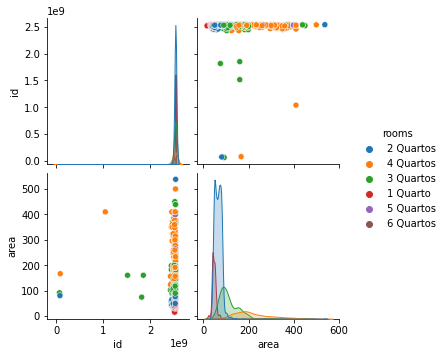

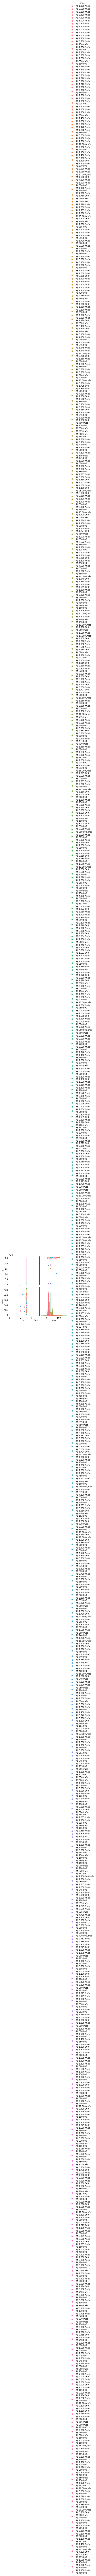

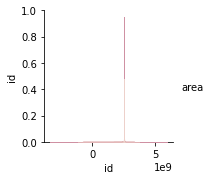

In [49]:
# Visualize pairplot of df
sns.pairplot(df_an, hue='rooms')

sns.pairplot(df_an, hue='price')

sns.pairplot(df_an,hue = 'area')